A simple GARCH estimation

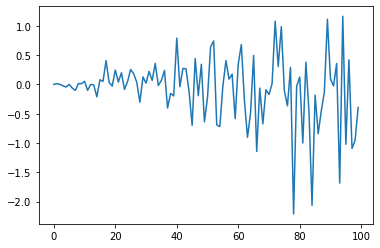

In [95]:
# create a simple white noise with increasing variance
from random import gauss
from random import seed
from matplotlib import pyplot
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf # for acf plots

# seed pseudorandom number generator
seed(1)

# create dataset
data = [gauss(0, i*0.01) for i in range(0,100)]

# plot
pyplot.plot(data)
pyplot.show()

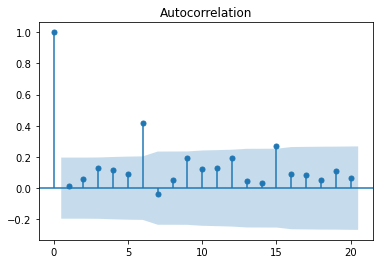

In [96]:
# square the dataset
squared_data = [x**2 for x in data]
squared_data = np.array(squared_data)

# create acf plot
plot_acf(squared_data)
pyplot.show()

## ARCH model

In [97]:
from arch import arch_model

In [98]:
# split into train/test
n_test = 10
train, test = data[:-n_test], data[-n_test:]

# define model
model = arch_model(train, mean='Zero', vol='ARCH', p=15)

# fit model
model_fit = model.fit()

# forecast the test set
yhat = model_fit.forecast(horizon=n_test, reindex=False)

Iteration:      1,   Func. Count:     18,   Neg. LLF: 88229.21081826466
Iteration:      2,   Func. Count:     36,   Neg. LLF: 145.16342486790123
Iteration:      3,   Func. Count:     54,   Neg. LLF: 128.16575632743994
Iteration:      4,   Func. Count:     72,   Neg. LLF: 109.21743453644488
Iteration:      5,   Func. Count:     90,   Neg. LLF: 36.50573961108787
Iteration:      6,   Func. Count:    108,   Neg. LLF: 39.65738666780856
Iteration:      7,   Func. Count:    126,   Neg. LLF: 28.719726047459652
Iteration:      8,   Func. Count:    143,   Neg. LLF: 28.02027100942711
Iteration:      9,   Func. Count:    161,   Neg. LLF: 34.94722530353781
Iteration:     10,   Func. Count:    180,   Neg. LLF: 30.03624007733368
Iteration:     11,   Func. Count:    198,   Neg. LLF: 26.91679529681816
Iteration:     12,   Func. Count:    216,   Neg. LLF: 35.23299079510191
Iteration:     13,   Func. Count:    235,   Neg. LLF: 25.557783816017935
Iteration:     14,   Func. Count:    253,   Neg. LLF: 25.49

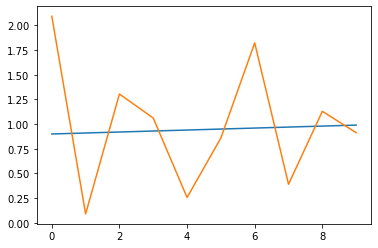

In [99]:
# plot the actual variance
var = [i*0.01 for i in range(0,100)]
pyplot.plot(var[-n_test:])

# plot forecast variance
pyplot.plot(yhat.variance.values[-1, :])
pyplot.show()

In [100]:
yhat.variance.values[-1,:]

array([2.09288594, 0.09017704, 1.30488412, 1.06125942, 0.25690556,
       0.85993408, 1.82286956, 0.39067781, 1.130076  , 0.91277482])

## GARCH model

In [102]:
# split into train/test
n_test = 10
train, test = data[:-n_test], data[-n_test:]

# define model
model = arch_model(train, mean='Zero', vol='GARCH', p=15, q=15)

# fit model
model_fit = model.fit()

# forecast the test set
yhat = model_fit.forecast(horizon=n_test, reindex=True)

Iteration:      1,   Func. Count:     33,   Neg. LLF: 134.2317665883839
Iteration:      2,   Func. Count:     70,   Neg. LLF: 95219.42875514245
Iteration:      3,   Func. Count:    103,   Neg. LLF: 544.0651713801462
Iteration:      4,   Func. Count:    136,   Neg. LLF: 359.82260287255474
Iteration:      5,   Func. Count:    169,   Neg. LLF: 120.68468720344026
Iteration:      6,   Func. Count:    202,   Neg. LLF: 57.67993058484209
Iteration:      7,   Func. Count:    235,   Neg. LLF: 37.233844550362896
Iteration:      8,   Func. Count:    268,   Neg. LLF: 44.284908834009805
Iteration:      9,   Func. Count:    301,   Neg. LLF: 30.95579466733611
Iteration:     10,   Func. Count:    334,   Neg. LLF: 26.9575229574196
Iteration:     11,   Func. Count:    366,   Neg. LLF: 31.35798709776981
Iteration:     12,   Func. Count:    400,   Neg. LLF: 30.01446108535507
Iteration:     13,   Func. Count:    433,   Neg. LLF: 28.461078235320006
Iteration:     14,   Func. Count:    466,   Neg. LLF: 27.699

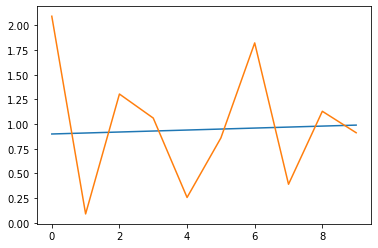

In [103]:
# plot the actual variance
var = [i*0.01 for i in range(0,100)]
pyplot.plot(var[-n_test:])
# plot forecast variance
pyplot.plot(yhat.variance.values[-1, :])
pyplot.show()

# Another example

Load financial TS from Yahoo Finance

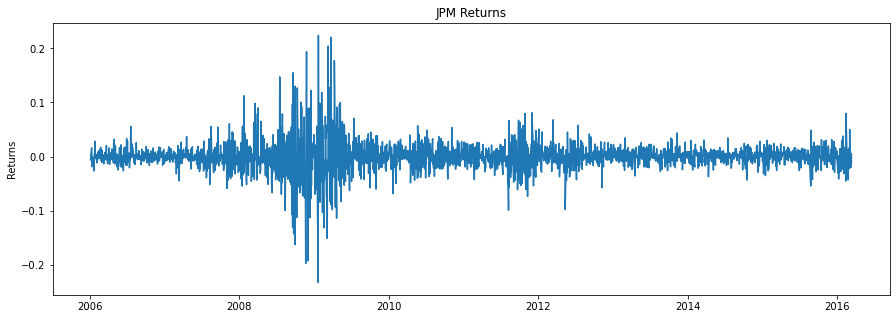

In [59]:
import numpy as np
import pyflux as pf
import pandas as pd
from pandas_datareader import DataReader
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

jpm = DataReader('JPM',  'yahoo', datetime(2006,1,1), datetime(2016,3,10))
returns = pd.DataFrame(np.diff(np.log(jpm['Adj Close'].values)))
returns.index = jpm.index.values[1:jpm.index.values.shape[0]]
returns.columns = ['JPM Returns']

plt.figure(figsize=(15,5));
plt.plot(returns.index,returns);
plt.ylabel('Returns');
plt.title('JPM Returns');

One way to visualize the underlying volatility of the series is to plot the absolute returns $|y|$:

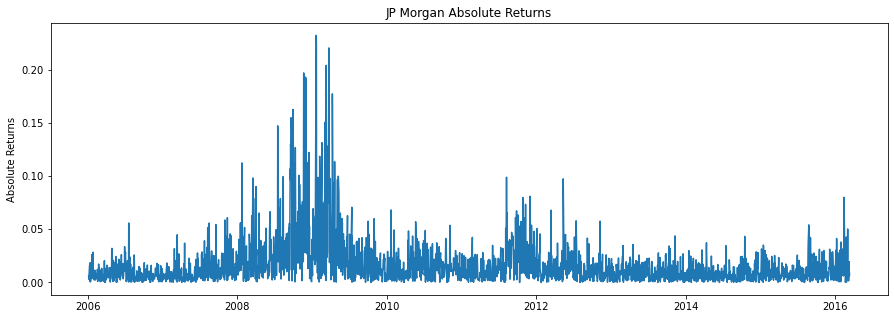

In [60]:
plt.figure(figsize=(15,5))
plt.plot(returns.index, np.abs(returns))
plt.ylabel('Absolute Returns')
plt.title('JP Morgan Absolute Returns');

There appears to be some evidence of volatility clustering over this period. Let’s fit a `GARCH(1,1)` model using a point mass estimate $z^{\text{MLE}}$:

In [61]:
# split into train/test
n_test = 10
train, test = returns[:-n_test], returns[-n_test:]

In [72]:
model = pf.GARCH(train, p=1, q=1)
x = model.fit()
x.summary()

GARCH(1,1)                                                                                                
======================================================= ==================================================
Dependent Variable: JPM Returns                         Method: MLE                                       
Start Date: 2006-01-05 00:00:00                         Log Likelihood: 6570.0371                         
End Date: 2016-02-25 00:00:00                           AIC: -13132.0743                                  
Number of observations: 2552                            BIC: -13108.6957                                  
Latent Variable                          Estimate   Std Error  z        P>|z|    95% C.I.                 
======================================== ========== ========== ======== ======== =========================
Vol Constant                             0.0                                                              
q(1)                                 

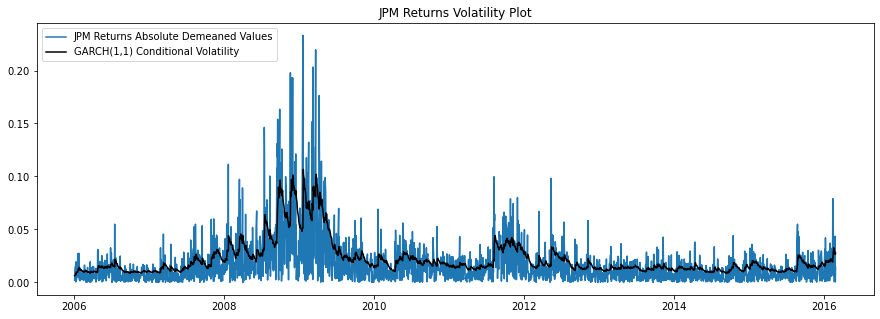

In [73]:
model.plot_fit(figsize=(15,5))

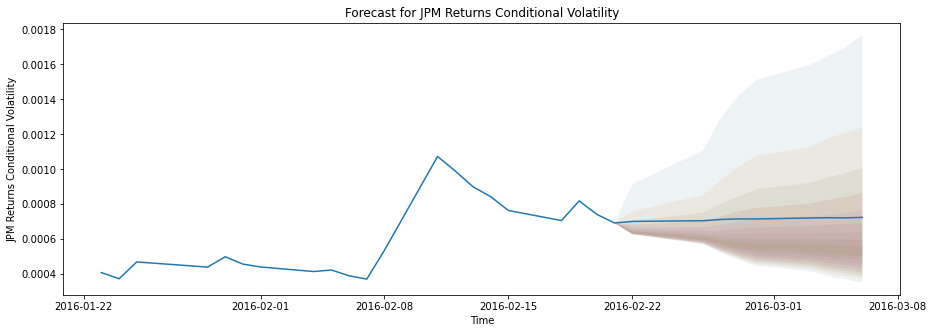

In [74]:
model.plot_predict(h=10, figsize=(15,5))

In [75]:
model.predict(h=10)

,JPM Returns
2016-02-21,0.000693
2016-02-22,0.000697
2016-02-26,0.000703
2016-02-27,0.000708
2016-02-28,0.000710
2016-02-29,0.000712
2016-03-03,0.000712
2016-03-04,0.000717
2016-03-05,0.000716
2016-03-06,0.000715


In [76]:
test = test.rename(columns={'JPM Returns': 'volatility'})

In [77]:
test

,volatility,fit_volatility
2016-02-26,0.009254,0.000709
2016-02-29,-0.021786,0.000700
2016-03-01,0.050227,0.000704
2016-03-02,0.009415,0.000710
2016-03-03,0.003341,0.000715
2016-03-04,0.001500,0.000718
2016-03-07,-0.001833,0.000720
2016-03-08,-0.019542,0.000725
2016-03-09,0.005768,0.000731
2016-03-10,-0.008664,0.000734


In [78]:
test["fit_volatility"] = model.predict(h=10).values

In [79]:
test

,volatility,fit_volatility
2016-02-26,0.009254,0.000693
2016-02-29,-0.021786,0.000699
2016-03-01,0.050227,0.000703
2016-03-02,0.009415,0.000706
2016-03-03,0.003341,0.000708
2016-03-04,0.001500,0.000708
2016-03-07,-0.001833,0.000712
2016-03-08,-0.019542,0.000715
2016-03-09,0.005768,0.000717
2016-03-10,-0.008664,0.000722
